<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

### Learning Objectives
 
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cycles, and residual).
- Decompose time series data into trend, seasonality, and residual components.
- Plot the decomposed components of a time series.

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

- **Residual**: The leftover or error component.

A time series can also have **cyclical** components that repeat at irregular intervals, such as what are often called "business cycles." Our decompositions will not have cyclical components.

### Guided Practice

We are going to play around with some bus data from Portland, Oregon. Load in the data set below and check it out.

In [1]:
import datetime
import dateutil

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bus = pd.read_csv('./data/bus.csv')
bus.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [3]:
bus.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


We'll need to clean this data a little. Let's simplify the names of the columns. There are also a couple of bad rows at the end of the file. We'll get rid of those. Additionally, we need to make the `riders` column an integer. 

In [6]:
# Drop the last two rows
bus.drop([114,115], inplace=True)

In [7]:
# Change the column names to "month" and "riders"
bus.columns = ['month', 'riders']
bus.head()

,month,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [11]:
# Cast "riders" to int
bus.loc[:, 'riders'].apply(type) # you will see they are string

# to cast to int
bus.loc[:, 'riders'] = bus.loc[:, 'riders'].apply(int)

In [13]:
bus.loc[:, 'riders'].apply(type) # now see it will int

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
5      <class 'int'>
6      <class 'int'>
7      <class 'int'>
8      <class 'int'>
9      <class 'int'>
10     <class 'int'>
11     <class 'int'>
12     <class 'int'>
13     <class 'int'>
14     <class 'int'>
15     <class 'int'>
16     <class 'int'>
17     <class 'int'>
18     <class 'int'>
19     <class 'int'>
20     <class 'int'>
21     <class 'int'>
22     <class 'int'>
23     <class 'int'>
24     <class 'int'>
25     <class 'int'>
26     <class 'int'>
27     <class 'int'>
28     <class 'int'>
29     <class 'int'>
           ...      
84     <class 'int'>
85     <class 'int'>
86     <class 'int'>
87     <class 'int'>
88     <class 'int'>
89     <class 'int'>
90     <class 'int'>
91     <class 'int'>
92     <class 'int'>
93     <class 'int'>
94     <class 'int'>
95     <class 'int'>
96     <class 'int'>
97     <class 'int'>
98     <class 'int'>
99     <class 'int'>
100    <class

In [12]:
bus.head()

,month,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
bus.tail()

In [16]:
# Convert "month" to datetime and set it as an unnamed index
bus.loc[:, 'month'] = pd.to_datetime(bus.loc[:, 'month'])
bus.set_index('month', inplace=True)

### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

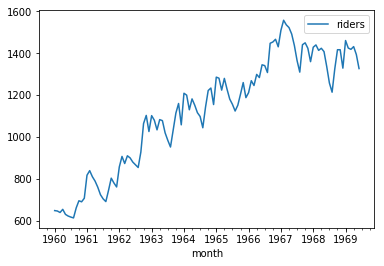

In [17]:
fig, ax = plt.subplots()
bus.plot(ax=ax);

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

In [18]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/asahani/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


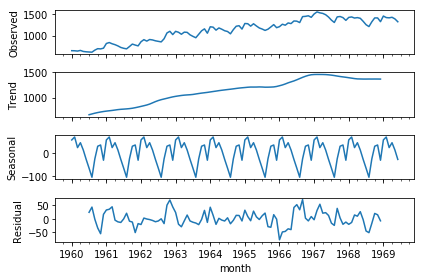

In [20]:
# Apply seasonal_decompose to the bus data and plot the result
decomposition = seasonal_decompose(bus.loc[:, 'riders'], freq=12)
fig = decomposition.plot()

If you don't specify a frequency then `seasonal_decompose` will infer in. In this case, it seems clear that we should expect 12-month seasonality, so putting it in by hand makes sense.

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

In [ ]:
# Plot just the seasonal component


In [ ]:
# Plot just the seasonal component


In [ ]:
# Plot just the residuals


<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

In [23]:
decomposition.resid

month
1960-01-01          NaN
1960-02-01          NaN
1960-03-01          NaN
1960-04-01          NaN
1960-05-01          NaN
1960-06-01          NaN
1960-07-01    23.713349
1960-08-01    43.111497
1960-09-01    -1.948688
1960-10-01   -34.374614
1960-11-01   -55.610725
1960-12-01    16.301312
1961-01-01    32.431520
1961-02-01    35.025270
1961-03-01    44.244020
1961-04-01    -5.407022
1961-05-01   -11.610147
1961-06-01   -13.834105
1961-07-01    -0.661651
1961-08-01    20.319830
1961-09-01    -9.032022
1961-10-01   -12.374614
1961-11-01   -51.444059
1961-12-01   -18.198688
1962-01-01   -21.485147
1962-02-01     2.400270
1962-03-01    -1.047647
1962-04-01    -3.198688
1962-05-01    -6.485147
1962-06-01   -11.209105
                ...    
1967-01-01    -3.860147
1967-02-01    30.525270
1967-03-01    53.702353
1967-04-01    20.509645
1967-05-01    22.514853
1967-06-01    12.040895
1967-07-01   -16.536651
1967-08-01   -24.763503
1967-09-01    38.342978
1967-10-01     2.875386
1967-11-01

In [31]:
residuals = decomposition.resid
residuals = residuals.loc[residuals.notnull()];

In [33]:
# Import plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


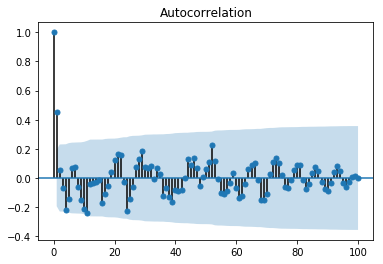

In [35]:
# Plot the ACF of the residuals
fig, ax = plt.subplots()
plot_acf(residuals, lags=100, ax=ax);

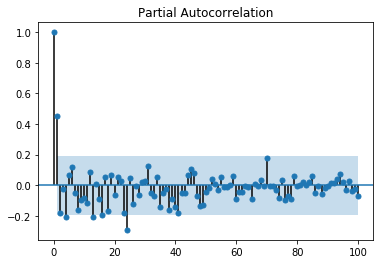

In [38]:
# Plot the PACF of the residuals
fig, ax = plt.subplots()
plot_pacf(residuals, lags=100, ax=ax);

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

# Recap

* Trend is a long-term change in the data. 
* Seasonality is a pattern of a fixed period that repeats in the data. 
* Residuals are the error components of the data.
* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.

**Exercise.**

In [ ]:
airline = pd.read_csv('./data/airline.csv')
airline.head()

In [ ]:
airline.tail()

- Get rid of the last row

- Rename the columns "month" and "passengers", respectively.

- Cast "passengers" to int

- Convert "month" to datetime.

- Make "month" the index, and drop its name.

- Make a lineplot of the number of passengers over time.

- Decompose the time series using the `.seasonal_decompose()` function with a seasonality frequency of 12, and plot the result.

- Interpret these plots.

There is a clear upward trend in airline passengers and strong annual seasonality. 